# Project: Investigate the TMdb Movie Database
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
      I have taken the movie dataset TMDb for analysing that contains information about 10,000 movies. 
    The purpose of this project will be to investigate the movie database and plot visualizations using Python.
    The questions explored are shown below.

### Questions : 
#### 1. What is the most popular genre of movies?
#### 2. How the profit of movies changed over the years?
#### 3. How are budget and revenue related ?
#### 4. Which movies are the most popular or profitable ?
#### 5. Which is the most successful production company ?

In [87]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

## Data Wrangling

### General Properties

In [88]:
#Loading data
movies = pd.read_csv('tmdb-movies.csv')

In [89]:
#General info on movie data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [90]:
#First 5 rows of database
movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [91]:
#Rows and Columns in movies data
movies.shape

(10866, 21)

The dataset contains 10866 rows and 21 columns

In [92]:
#Budget and Revenue rows that contain a value of zero
print('There are {} Budget rows contais zero'.format((movies.budget == 0).sum()))
print('There are {} Revenue rows contains zero'.format((movies.revenue == 0).sum()))

There are 5696 Budget rows contais zero
There are 6016 Revenue rows contains zero


In [93]:
#Total number of missing values in movie dataset
sum(len(movies.index) - movies.count())

13434

There are plenty of zeros in both the Budget,Revenue Rows and and missing values in dataset.
These data will be removed later on.

## Data Cleaning

In [94]:
#Checking column data types
movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

##### The release_year column is an int64 datatype so i decide to change it to the datetime datatype which is more appropriate

#### Changing Datatypes

In [95]:
#Change release_year column datatype to datetime
movies['release_year'] = movies['release_year'].astype(str)
movies['release_year'] = pd.to_datetime(movies['release_year'])

In [96]:
#Checking
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null datetime64[ns]
budget_adj      

##### release_year column is now a datetime column

#### Checking and Removing Duplicate Rows


In [97]:
# Checking for duplicate rows
movies[movies.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010-01-01,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010-01-01,30000000.0,967000.0


we found the dataset containing 2 rows having same column values.So i decide to remove the one duplicated row from this dataset.

In [98]:
# Removing the duplicate row
movies.drop_duplicates(inplace=True)

In [99]:
movies.shape

(10865, 21)

Now all the duplicate rows are removed.Now the dataset containing 10865 rows and 21 columns

#### Removing unnecessary columns

After analysing the dataset my conclusoins are
 1. no use of maintaining two id columns. maintaning only one id is good.
 2. there is already the budget and revenue stated, we can remove budget_adj and revenue_adj column.
 3. homepage,tagline,overview,keywords,budget_adj,revenue_adj,release_date these columns do not provide any significant data that can be analysed


In [100]:
#Drop unnecessary columns 
movies_data = movies.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'release_date', 'revenue_adj'], axis=1)
movies_data.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015-01-01
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015-01-01
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015-01-01
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015-01-01
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015-01-01


In [101]:
#checking columns 
movies_data.shape

(10865, 13)

After removing the uneccesary columns now dataset having 13 columns.

#### Check all the columns that having missing values


In [102]:
#Missing values in Dataset
len(movies_data.index) - movies_data.count()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [103]:
#Total number of missing values 
sum(len(movies_data.index) - movies_data.count())

1173

There are 1173 rows having missing values

Remove the rows that contain missing values

In [104]:
#Removing rows that contain missing values
movies_data.dropna(inplace=True)
movies_data.shape

(9772, 13)

After removing the rows containing missing values now we have 9772 rows in our dataset.


#### Checking budget and revenue column having zero values¶

In [105]:
#Checking Budget and Revenue rows that contain a value of zero
print(' {} Budget rows containing the value of zero'.format((movies_data.budget == 0).sum()))
print(' {} Revenue rows containing the value of zero'.format((movies_data.revenue == 0).sum()))

 4751 Budget rows containing the value of zero
 5022 Revenue rows containing the value of zero


#### Removing Budget and Revenue Rows that Contain a Value of Zero¶

The dataset still have plenty of Budget and Revenue rows that contain a value of zero
Removing them takes place below

In [106]:
#Removing rows with Budget and Revenue equal to value zero
movies_data.replace(0, np.nan, inplace=True)
movies_data.dropna(inplace=True)

In [107]:
#Checking again Budget and Revenue rows that contain a value of zero
print('{} Budget rows containing the value of zero'.format((movies_data.budget == 0).sum()))
print('{} Revenue rows containing the value of zero'.format((movies_data.revenue == 0).sum()))

0 Budget rows containing the value of zero
0 Revenue rows containing the value of zero


In [108]:
#Remove duplicate rows
movies_data.drop_duplicates(inplace=True)

In [109]:
print("Duplicate Rows  : {}".format(movies_data.duplicated().sum()))

Duplicate Rows  : 0


Now that all duplicates and zero values have been removed and the data is clean we can begin exploring our questions

In [110]:
#Let's check all data are perfectly cleaned 
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000


In [111]:
# Saving cleaned data to a new csv file
movies_data.to_csv('clean_movies.csv')

Cleaned data saved into another csv file.

## Exploratory Data Analysis

### Research Question 1 : What is the most popular genre of movies?

In [112]:
#Splitting the genres seprated by |
genres_split=movies_data['genres'].str.cat(sep='|')
genres_split = pd.Series(genres_split.split('|'))

In [113]:
#Couting by genres
genre_count = genres_split.value_counts(ascending = False)
genre_count

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
dtype: int64

It clearly shows that drama is the most popular genre. 1729 movies were in drama genre. 

Let's plot this

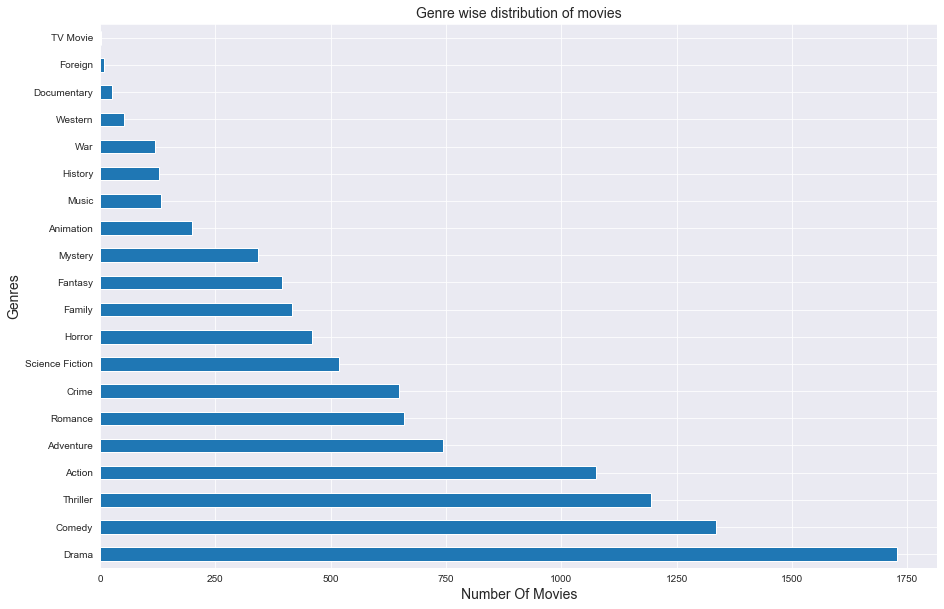

In [114]:
genre_count.plot(kind= 'barh',figsize=(15,10))
def plotchart(title,xlabel,ylabel):
        plt.title(title,fontsize=14)
        plt.xlabel(xlabel,fontsize=14)
        plt.ylabel(ylabel,fontsize=14);

       
plotchart('Genre wise distribution of movies','Number Of Movies','Genres')

After analysing the genres it clearly says over the years drama has been the most popular category of movies.


### Research Question 2 : How the profit of movies changed over the years?

Profit was calculated by subtracting the budget of each movie from the revenue it made 

In [115]:
#Insering a 'profit' column after 'budget' and 'revenue' column
# profit calculated by subtracting the budget of each movie from the revenue it made 
movies_data.insert(4,'profit',movies_data['revenue']-movies_data['budget'])
movies_data.head(5)

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015-01-01
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015-01-01
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015-01-01
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015-01-01
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015-01-01


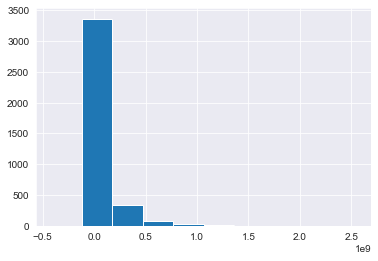

In [116]:
#Distribution of Profit
movies_data.profit.hist();

The distribution of movies is rightly skewed.
Grouping the sum of profits in each year will get a correct view.

Let's group by the sum of profits,in each year

In [117]:
#Creating a new dataframe that groups average movie profit by year
newdata = movies_data[['release_year', 'profit']].groupby('release_year').sum()
newdata.head()

,profit
release_year,
1960-01-01,108198052.0
1961-01-01,299083188.0
1962-01-01,166879846.0
1963-01-01,115411882.0
1964-01-01,294678387.0


In the year 1960 the sum of average movie profit was 108 million dollars.

In [118]:
newdata.tail()

,profit
release_year,
2011-01-01,1.497194e+10
2012-01-01,1.656595e+10
2013-01-01,1.578655e+10
2014-01-01,1.667620e+10
2015-01-01,1.903215e+10


In the year 2015 the sum of average movie profit was 1.903215e+10.The growth of profit was increasing over years.

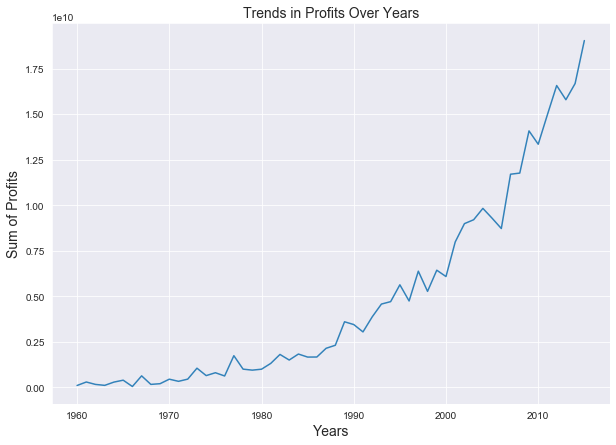

In [119]:
#Plotting trend of sum of profits in each year over all the years
profit_sum = newdata.profit

plt.subplots(figsize=(10,7))
plt.plot(np.arange(1960, 2016), profit_sum, alpha=0.9)
plotchart('Trends in Profits Over Years','Years','Sum of Profits')

There is an exponential growth in sum of all movie profits each year over the years

### Research Question 3 : How are budget and revenue related ?

Finding the movies that had made maximum budgets

In [120]:
#Sorting the movies by budget
movies_data[movies_data['budget'].notnull()][['original_title','budget','release_year']].sort_values('budget',ascending=False).head(10)

,original_title,budget,release_year
2244,The Warrior's Way,425000000.0,2010-01-01
3375,Pirates of the Caribbean: On Stranger Tides,380000000.0,2011-01-01
7387,Pirates of the Caribbean: At World's End,300000000.0,2007-01-01
14,Avengers: Age of Ultron,280000000.0,2015-01-01
6570,Superman Returns,270000000.0,2006-01-01
1929,Tangled,260000000.0,2010-01-01
4411,John Carter,260000000.0,2012-01-01
7394,Spider-Man 3,258000000.0,2007-01-01
5508,The Lone Ranger,255000000.0,2013-01-01
643,X-Men: Days of Future Past,250000000.0,2014-01-01


The Warrior's Way movie made maximum budget of 425000000 dollars. And it is released in the year 2010.

Finding the movies that had made most revenue.

In [121]:
#Sorting the movies by revenue 
movies_data[movies_data['revenue'].notnull()][['original_title','revenue','release_year']].sort_values('revenue',ascending=False).head(10)

,original_title,revenue,release_year
1386,Avatar,2.781506e+09,2009-01-01
3,Star Wars: The Force Awakens,2.068178e+09,2015-01-01
5231,Titanic,1.845034e+09,1997-01-01
4361,The Avengers,1.519558e+09,2012-01-01
0,Jurassic World,1.513529e+09,2015-01-01
4,Furious 7,1.506249e+09,2015-01-01
14,Avengers: Age of Ultron,1.405036e+09,2015-01-01
3374,Harry Potter and the Deathly Hallows: Part 2,1.327818e+09,2011-01-01
5422,Frozen,1.274219e+09,2013-01-01
5425,Iron Man 3,1.215440e+09,2013-01-01


Avatar has been the most revenue generating movie.And the revenue made is 2.781506e+09 dollars. It released in 2009.

For plotting budget and revenue over the years let's calculate the mean of both budget and revenue

In [122]:
print("The average budget(over the years) :",movies_data['budget'].mean())
print("The average revenue(over the years) :",movies_data['revenue'].mean())

The average budget(over the years) : 37607996.559526935
The average revenue(over the years) : 108973391.99159001


From above analysis we can conclude that movies on an average have always returned better revenue than the budget. 

Let's plot it

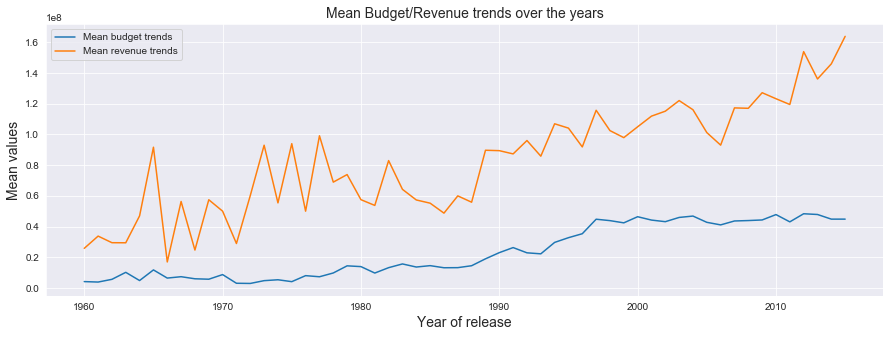

In [123]:
#plotting budget and revenue over the years
budget_yearly=movies_data[movies_data['budget'].notnull()][['release_year','budget']].groupby('release_year').mean()
revenue_yearly=movies_data[movies_data['revenue'].notnull()][['release_year','revenue']].groupby('release_year').mean() 

plt.figure(figsize=(15,5))
plt.plot(budget_yearly,label='Mean budget trends')
plt.plot(revenue_yearly,label='Mean revenue trends')

plotchart('Mean Budget/Revenue trends over the years','Year of release','Mean values')
plt.legend(loc='upper left')
plt.show();

From above plot we can conclude that movies on an average have always returned better revenue than the budget. 

### Research Question 4 : Which movies are the most popular or profitable ?

Let's take 20 movies that made most profit 

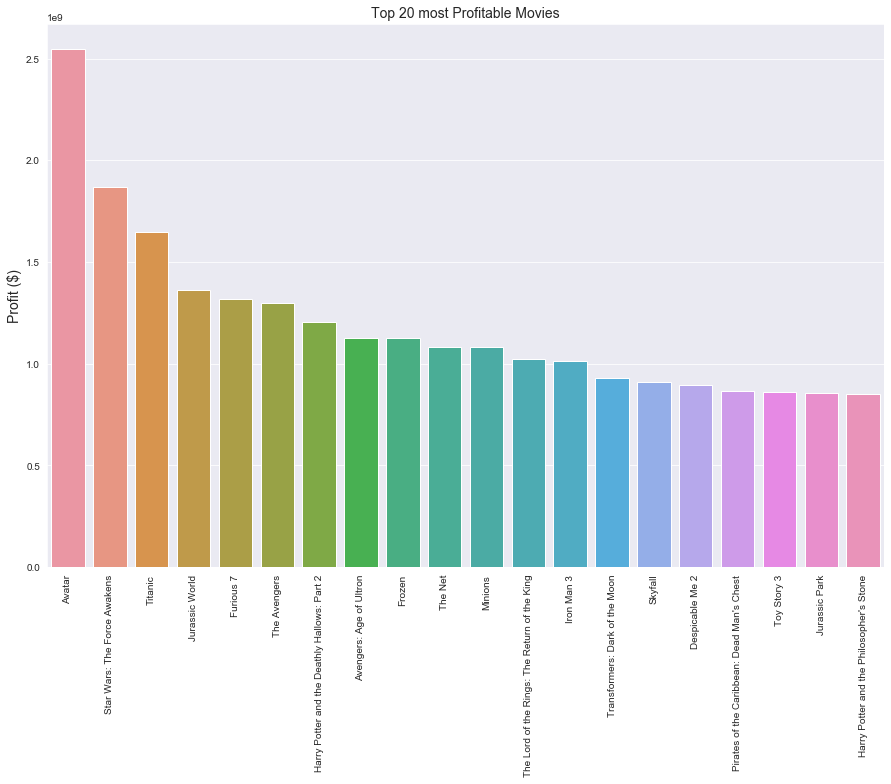

In [124]:
#The 20 movies that made the most profit
x = movies_data[['original_title','profit']].sort_values(by=['profit'], ascending=False).iloc[:20,].original_title
y = movies_data[['original_title','profit']].sort_values(by=['profit'], ascending=False).iloc[:20,].profit

plt.subplots(figsize=(15, 10))
sns.barplot(x = x, y = y)
plt.xticks(rotation='vertical')
plotchart('Top 20 most Profitable Movies','','Profit ($)')

Avatar made the most profit around 2.5 Billion Dollars out of all movies  

Let's take 20 most popular movies

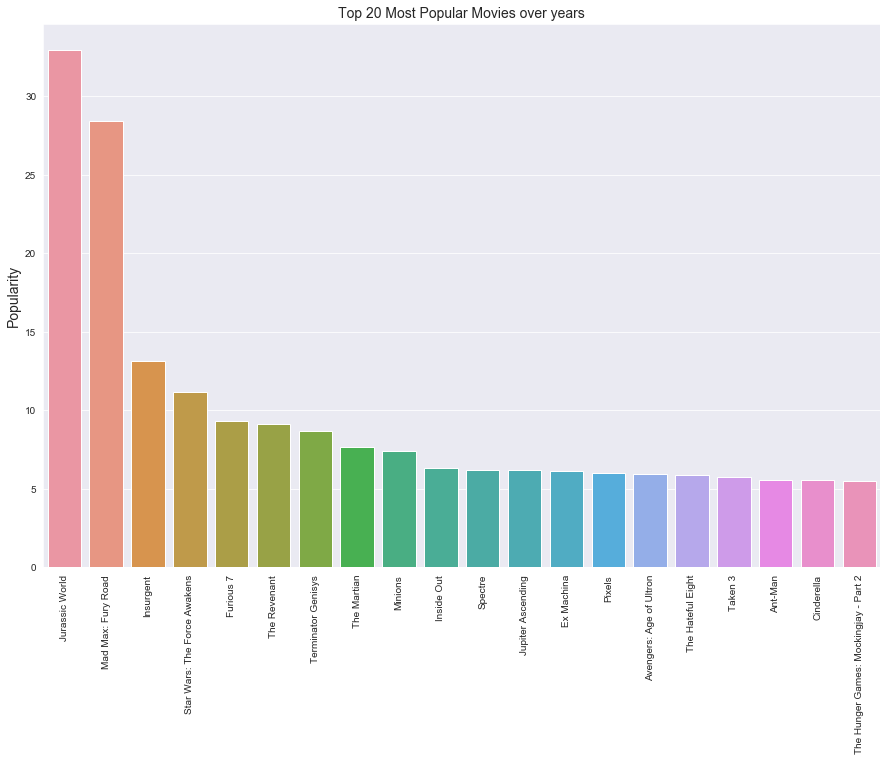

In [125]:
#The 20 most popular movies over years
x = movies_data[['original_title']].iloc[:20,].original_title
y = movies_data[['popularity']].iloc[:20,].popularity

plt.subplots(figsize=(15, 10))
sns.barplot(x = x, y = y)
plt.xticks(rotation='vertical')
plotchart('Top 20 Most Popular Movies over years','','Popularity')


The most popular movie out of all movies : Jurassic World

### Research Question 5 : Which is the the most successful production company ?

In [126]:
#Splitting the column'production_company'
production_comp=movies_data['production_companies'].str.cat(sep='|')
production_comp = pd.Series(production_comp.split('|'))

count = production_comp.value_counts(ascending = False)
count.head(15)

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
New Line Cinema                           152
Walt Disney Pictures                      117
Touchstone Pictures                       116
Metro-Goldwyn-Mayer (MGM)                 109
Relativity Media                          102
Columbia Pictures Corporation             101
Miramax Films                              83
TriStar Pictures                           75
Village Roadshow Pictures                  74
DreamWorks SKG                             73
dtype: int64

The production company Universal Pictures releases 329 movies.

Plot this analysis

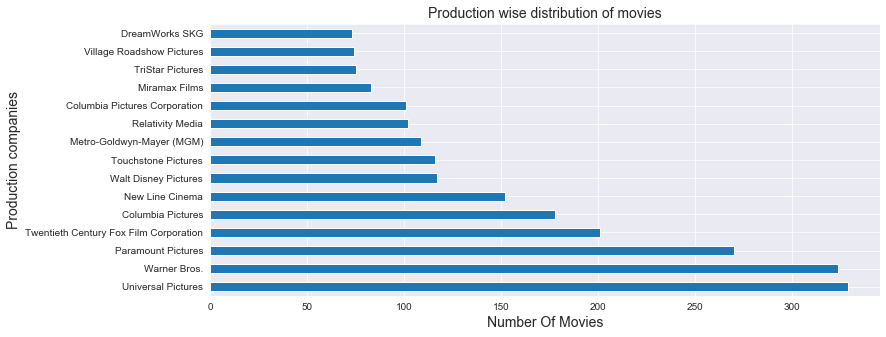

In [127]:
plt.figure(figsize=(12,5))
count.head(15).plot(kind='barh')

plotchart('Production wise distribution of movies','Number Of Movies', 'Production companies')
plt.show()

The plot clearly shows that the production company Universal Pictures releases the most number of movies.

### Limitations

1. I am not sure about the data provided to us is completely correct and up-to-date.
2. There were plenty of rows having null/missing data. Dropping those rows (containing missing/null values) also affected the overall analysis.


### Conclusions

1. Over the years drama has been the most popular genre of movies.
2. There is an exponential growth in sum of all movie profits each year over the years.
3. The movies on an average have always returned better revenue than the budget
4. Avatar made the most profit out of all movies.
   Jurassic World was the most popular movie out of all movies.
5. The production company Universal Pictures releases the most number of movies.


The above conclusions are not determine the success of a movie. These are so many other parameters that could make a movie successful. Considering these above parameters there is high probabality of a movie's success.

### Resources
 
#### https://pandas.pydata.org/pandas-docas/stable/reference/api/pandas.DataFrame.sort_values.html 
#### https://stackoverflow.com/questions/44537249/grouping-by-with-where-conditions-in-pandas 
#### https://stackoverflow.com/questions/50394099/separate-columns-based-on-genre